In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from PIL import Image
%matplotlib inline

In [35]:
#read the file
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

# one picture just like one data, each pixel is a column

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [65]:
faces.images[i][1][1]

30.666666

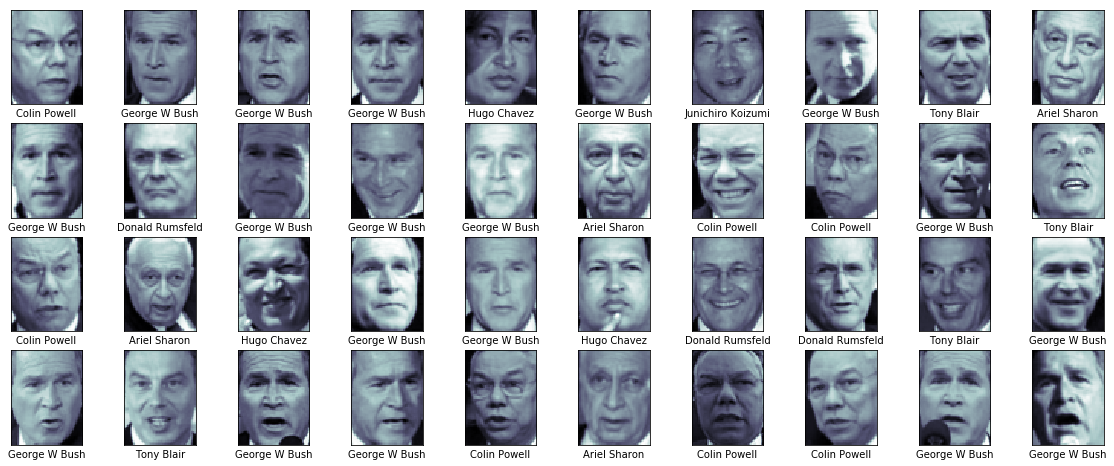

In [50]:
fig, ax = plt.subplots(4, 10, figsize=(20, 8))


for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])  

In [74]:
pca = PCA(1)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

IndexError: index 150 is out of bounds for axis 0 with size 1

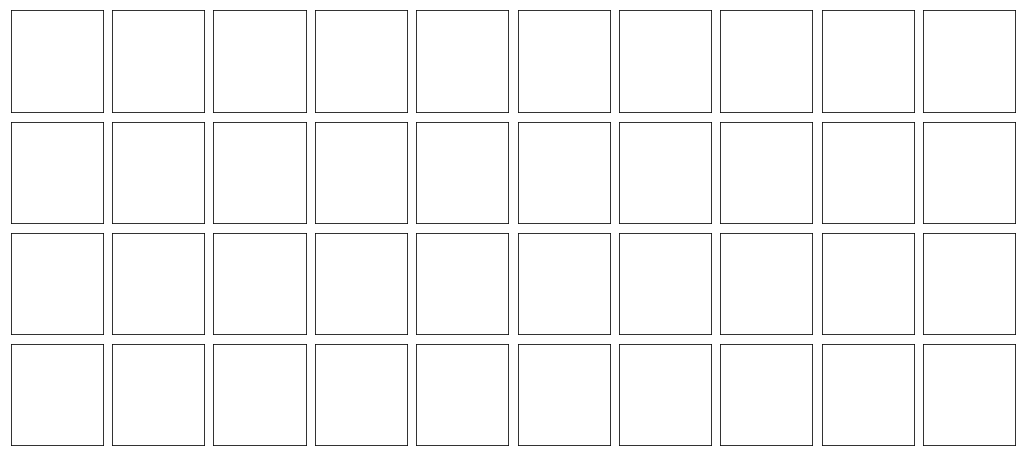

In [75]:
fig, axes = plt.subplots(4, 10, figsize=(18, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# pca.components_[i] 輸出第i個pca權重
for i, ax in enumerate(axes.flat):
    j = i + 150
    ax.imshow(pca.components_[j].reshape(62, 47), cmap='bone')

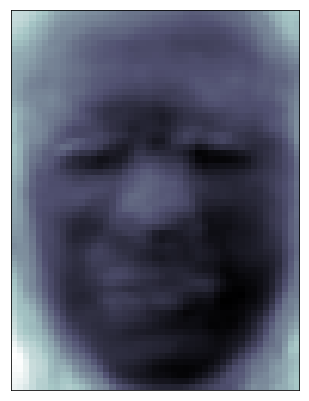

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

ax.imshow(pca.components_[0].reshape(62, 47), cmap='bone')

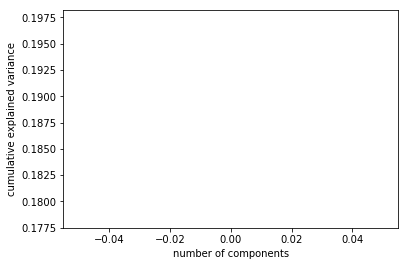

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [78]:
# Compute the components and projected faces
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

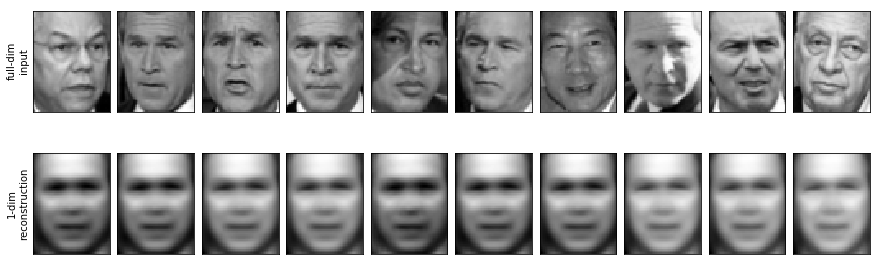

In [82]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(15, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('1-dim\nreconstruction');

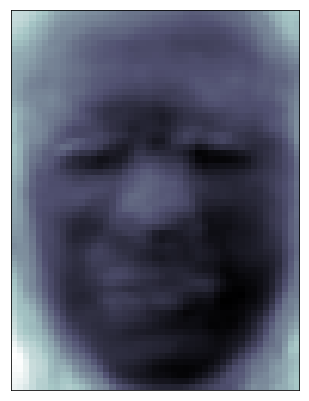

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

ax.imshow(pca.components_[0].reshape(62, 47), cmap='bone')

In [89]:
projected[i].reshape(62, 47)

array([[  98.88329315,  101.9723053 ,  107.99606323, ...,  110.29618073,
         107.10083008,  106.05219269],
       [ 100.64766693,  104.80064392,  112.73600769, ...,  112.49885559,
         107.97601318,  106.5521698 ],
       [ 103.71035004,  109.20117188,  118.32941437, ...,  115.65766907,
         109.13536072,  107.28379822],
       ..., 
       [  87.570961  ,   90.96888733,   95.90976715, ...,  128.76795959,
         121.90625763,  116.76795197],
       [  85.45366669,   89.5281601 ,   95.11094666, ...,  130.48152161,
         123.07927704,  117.10773468],
       [  83.86092377,   87.95579529,   94.29262543, ...,  131.85987854,
         124.11110687,  116.96117401]], dtype=float32)